# Periodic Boundary Conditions

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

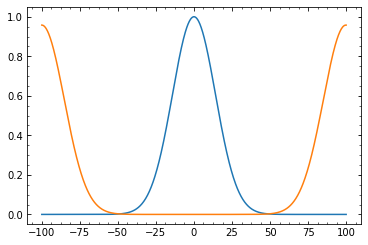

In [5]:
def advect_step(f, c, dx, dt) :
    """
    Function to compute the solution to the advection
    equation at the next timestep using Euler's method
    and a right-handed finite differencing scheme with
    *periodic* boundary conditions.
    
    Accepts parameters:
    f: 1-d array containing function values
    c: wave speed
    dx: spacing between points of f
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    
    # Right-handed difference for derivative of f
    f_deriv = (f[2:] - f[1:-1]) / dx
    
    # Forward-Euler time step for all points except the boundaries
    f_new[1:-1] = f[1:-1] + dt*c*f_deriv
    
    # Apply boundary conditions
    f_new[0] = f_new[-2]
    f_new[-1] = f_new[1]
    
    return f_new

xs = np.linspace(-100, 100, 1000)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 100 # specify a final time.
n_steps = int(t_final / dt)
c = 1

f_ini = np.exp(-xs**2/20**2)
f = f_ini
for n in range(n_steps) :
    f = advect_step(f, c, dx, dt)
    
plt.plot(xs, f_ini)
plt.plot(xs, f)

## The wave equation in 2+1 dimensions

Below is an implementation of the wave equation in two spatial dimensions, with Dirichilet boundary conditions. This implementation uses a centered second derivative and Euler's method for timestepping, a method which is not absolutely stable.

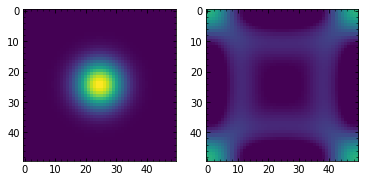

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def wave_step(f, g, dx, dt) :
    """
    Function to compute the solution to the 2-d wave
    equation at the next timestep using Euler's method,
    centered finite differencing, and Periodic
    boundary conditions.
    
    Accepts parameters:
    f: 2-d array containing function values
    g: 2-d array containing function values, time-derivative of f
    dx: spacing between points of f, assuming dx = dy
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    g_new = np.zeros_like(g)
    
    # 2-D Laplacian of f using array slicing, excluding boundaries
    # For an N x N array f, f_lap is the N-1 x N-1 array in the "middle"
    f_lap = (f[2:,1:-1] - 2*f[1:-1,1:-1] + f[:-2,1:-1]) / dx**2\
            + (f[1:-1,2:] - 2*f[1:-1,1:-1] + f[1:-1,:-2]) / dx**2
    
    # Alternative 2-D Laplacian of f, using a convolution operator.
    # ker = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / dx**2
    # f_lap = sig.convolve(f, ker, mode='valid')
    
    # Forward-Euler time step for all points except the boundaries
    g_new[1:-1,1:-1] = g[1:-1,1:-1] + dt*f_lap
    f_new = f + dt*g

    # Apply boundary conditions
    f_new[:,0] = f_new[:,-2]
    f_new[:,-1] = f_new[:,1]
    f_new[0,:] = f_new[-2,:]
    f_new[-1,:] = f_new[1,:]
    g_new[:,0] = g_new[:,-2]
    g_new[:,-1] = g_new[:,1]
    g_new[0,:] = g_new[-2,:]
    g_new[-1,:] = g_new[1,:]

    return f_new, g_new

xs = np.linspace(-100, 100, 50)
dx = xs[1] - xs[0]
dt = dx/10.
t_final = 130
n_steps = int(t_final/dt)

f_ini = np.exp(-(xs[np.newaxis,:]**2 + xs[:,np.newaxis]**2)/30**2)
f = f_ini
g = np.zeros_like(f)
for n in range(n_steps) :
    f, g = wave_step(f, g, dx, dt)

plt.subplot(1, 2, 1)
plt.imshow(f_ini, vmin=np.min(f_ini), vmax=np.max(f_ini))
plt.subplot(1, 2, 2)
plt.imshow(f, vmin=np.min(f_ini), vmax=np.max(f_ini))